In [2]:
from gbfs import GBBCFS

%matplotlib inline

## Example 1: t-SNE + JM distance, under budget constraint of 5 units

### Step 1: Init a dimensionality reduction method

In [3]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=10)

### Step 2: Init a GB-BC-FS object

In [4]:
from gbfs import GBBCFS

gbbcfs = GBBCFS(
    dataset_path="microsoft_malware_sample.csv",
    separability_metric="jm",
    dim_reducer_model=tsne,
    budget=5,
    alpha=0.5,
    epochs=100,
)

### Step 3: Feature Selection

In [5]:
selected_features = gbbcfs.select_features()

print("Selected Feature Indices:", selected_features)

Heuristic Stage for k=[28]:   1%|▌                                                     | 1/100 [00:03<05:56,  3.60s/it]

Selected Feature Indices: [5, 103, 107, 241, 196, 180, 222, 246, 202, 98, 36, 235, 24, 27, 60, 45, 0, 152, 147, 84, 137, 47, 105, 134, 70, 153, 208, 120]


In [6]:
selected_features_to_cost = gbbcfs.selected_features_to_cost

print("Selected Features to Cost:", selected_features_to_cost)

Selected Features to Cost: {'feature5': 0.762816826722956, 'feature103': 0.1836756795645042, 'feature107': 0.2975227339952715, 'feature241': 0.0952569122344666, 'feature196': 0.08320332412149, 'feature180': 0.1401727932189014, 'feature222': 0.2174383511616446, 'feature246': 0.1823727419000278, 'feature202': 0.0868433033441855, 'feature98': 0.0136363627965407, 'feature36': 0.3332661000001637, 'feature235': 0.0997427366089982, 'feature24': 0.0390088753189086, 'feature27': 0.2050053288569275, 'feature60': 0.3980333887970426, 'feature45': 0.0024994939582745, 'feature0': 0.3021196295453991, 'feature152': 0.3438688364779854, 'feature147': 0.0677620048711482, 'feature84': 0.0892084616935269, 'feature137': 0.1765640911981907, 'feature47': 0.2779663870606215, 'feature105': 0.2597672610119446, 'feature134': 0.0051799338158688, 'feature70': 0.1931612738564463, 'feature153': 0.0703942326916748, 'feature208': 0.048433033162492, 'feature120': 0.004267649511479}


### Step 4: Visualizing the Feature Space

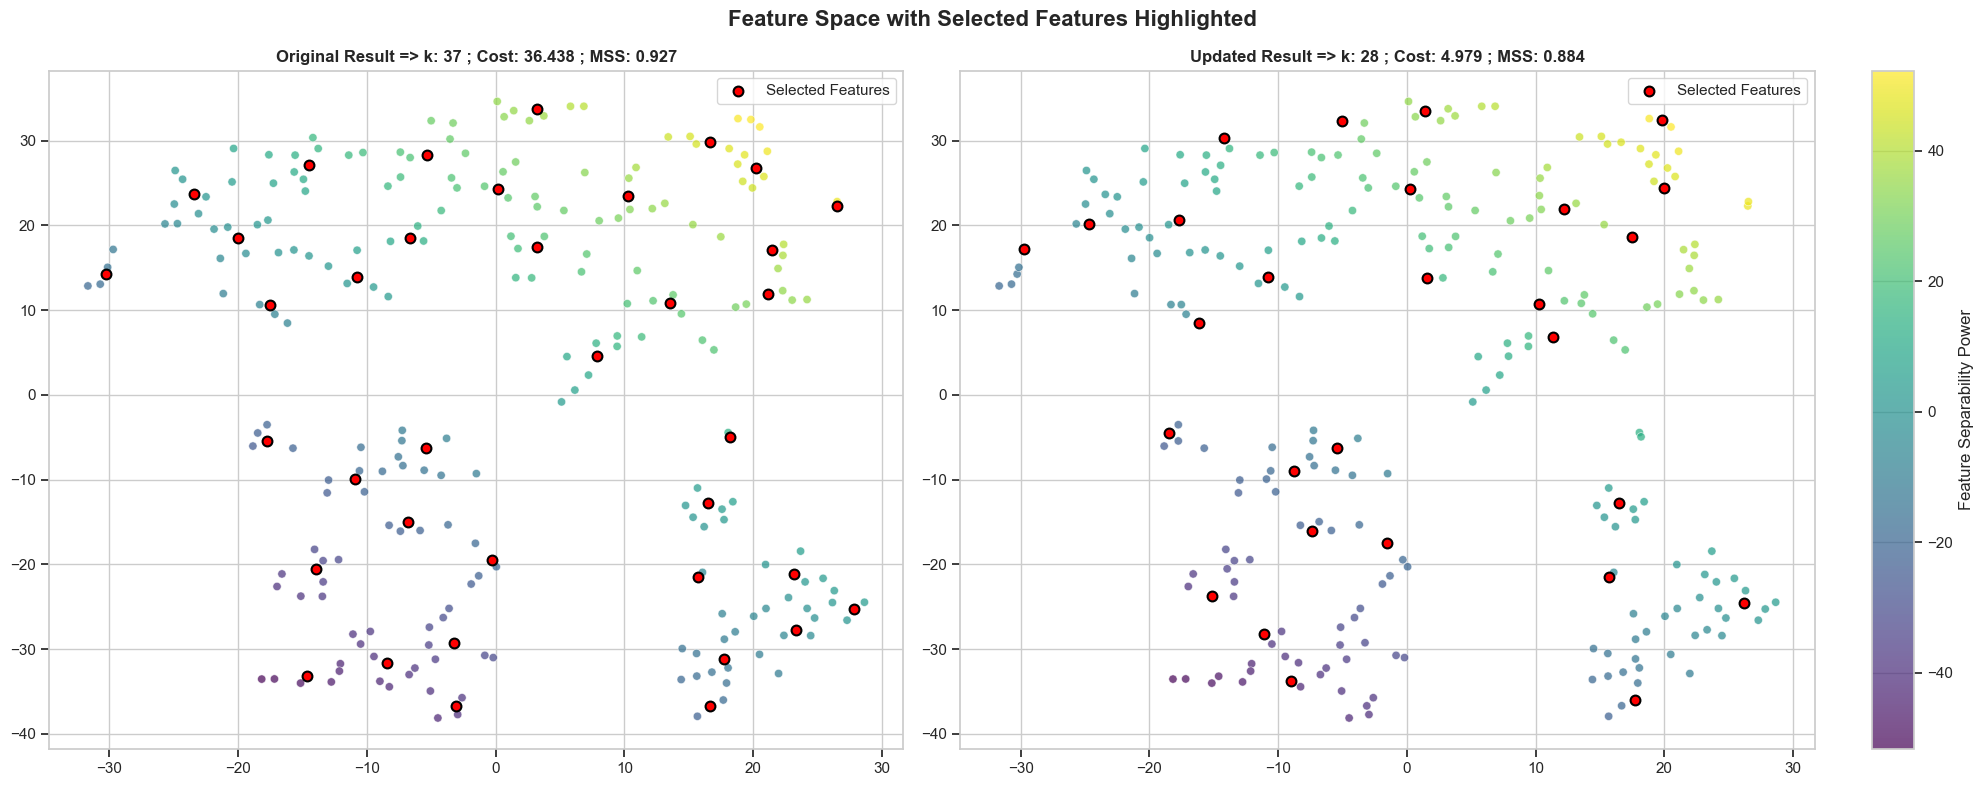

In [7]:
gbbcfs.plot_feature_space()

## Example 2: t-SNE + JM distance, under budget constraint of 20 units

In [8]:
from gbfs import GBBCFS

gbbcfs = GBBCFS(
    dataset_path="microsoft_malware_sample.csv",
    separability_metric="jm",
    dim_reducer_model=tsne,
    budget=20,
    alpha=0.5,
    epochs=100,
)

In [9]:
selected_features = gbbcfs.select_features()

print("Selected Feature Indices:", selected_features)

Heuristic Stage for k=[36]:   0%|                                                              | 0/100 [00:00<?, ?it/s]

Selected Feature Indices: [5, 107, 164, 229, 242, 213, 46, 180, 51, 125, 186, 98, 218, 35, 123, 144, 252, 14, 86, 225, 112, 28, 113, 124, 10, 247, 110, 38, 116, 47, 105, 81, 70, 119, 135, 120]


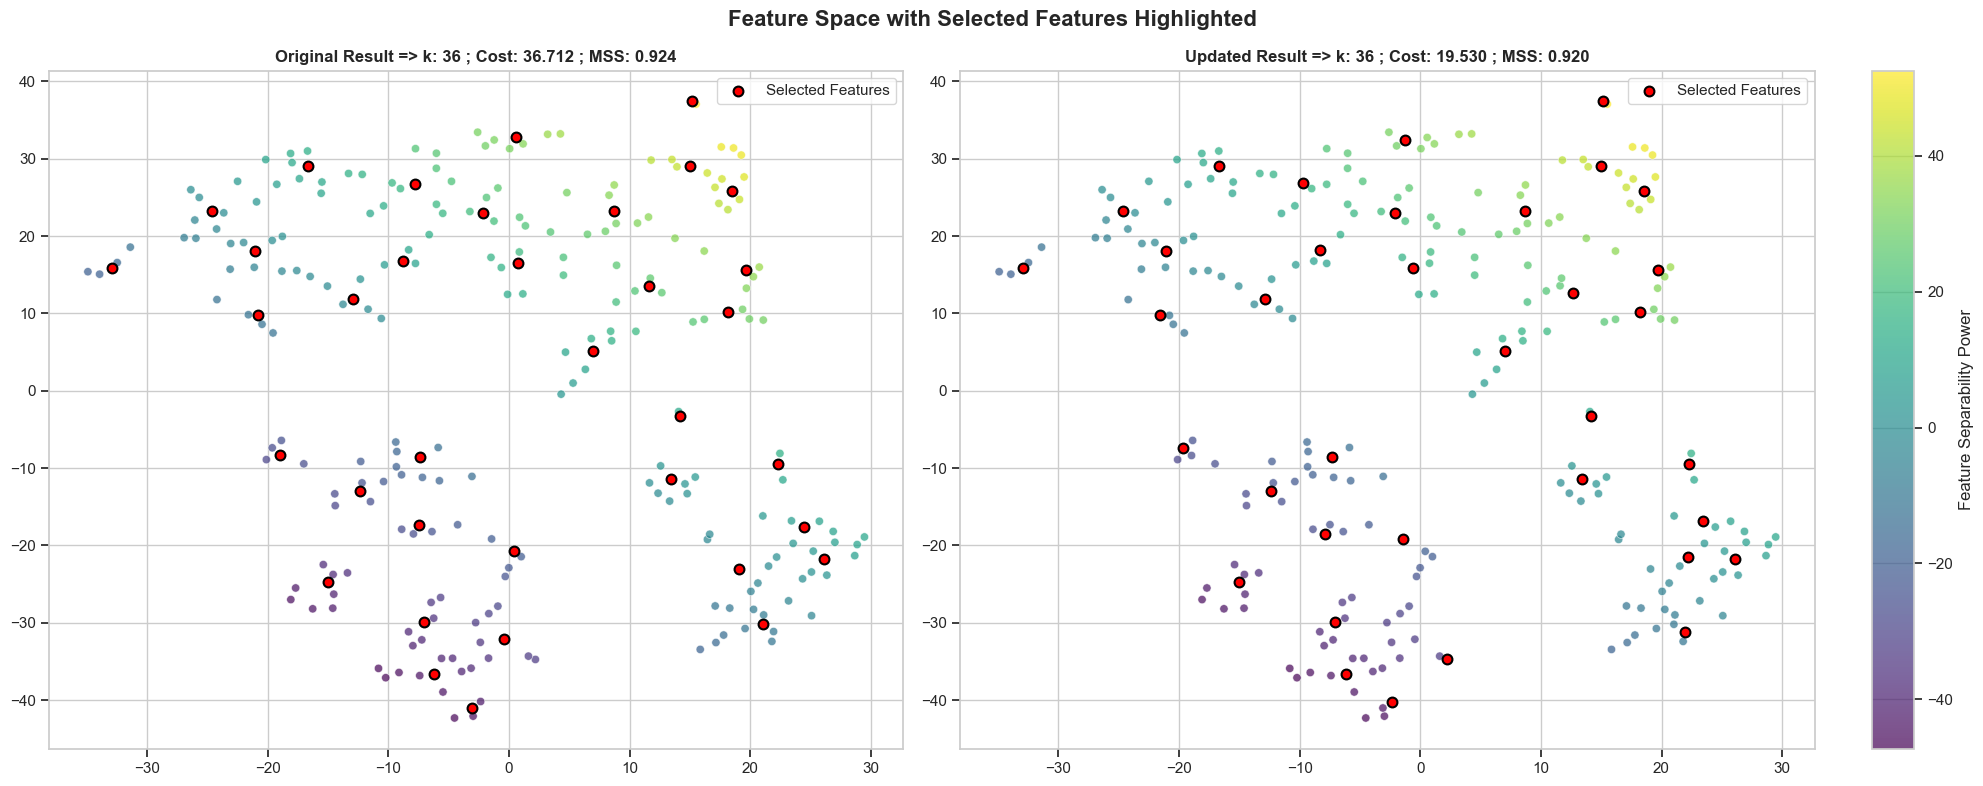

In [10]:
gbbcfs.plot_feature_space()

## GB-BC-FS Properites

### Properites before Applying the Heuristic

In [11]:
# get the knee value (= number of selected features)
gbbcfs.knee

36

In [12]:
# get the initial mss value, based on GB-AFS solution
gbbcfs.mss

0.9244623

In [13]:
# get the initial final selected features, based on GB-AFS solution
gbbcfs.selected_features

array([151, 166,  81, 247,  28,  14,  10,   8, 126, 218, 105, 217, 128,
        40, 135,  86,  38, 112, 120,  15,  35,  47,   9, 225,  70,  52,
       124, 186, 116, 209,  56, 119,  50, 113,  75, 110])

In [14]:
# get the initial cost, based on GB-AFS solution
gbbcfs.cost

36.711647230250456

### Properites after Applying the Heuristic

In [16]:
# get the *new* knee value, after the heuristic ended (= number of selected features)
gbbcfs.new_knee

36

In [17]:
# get the *new* mss value, after the heuristic ended
gbbcfs.new_mss

0.9197559

In [18]:
# get the final selected features
gbbcfs.new_selected_features

array([  5, 107, 164, 229, 242, 213,  46, 180,  51, 125, 186,  98, 218,
        35, 123, 144, 252,  14,  86, 225, 112,  28, 113, 124,  10, 247,
       110,  38, 116,  47, 105,  81,  70, 119, 135, 120])

In [19]:
# get the *new* cost, after the heuristic ended
gbbcfs.new_cost

19.530253551502156

In [20]:
# get the *new* final selected features, after the heuristic ended
gbbcfs.new_selected_features

array([  5, 107, 164, 229, 242, 213,  46, 180,  51, 125, 186,  98, 218,
        35, 123, 144, 252,  14,  86, 225, 112,  28, 113, 124,  10, 247,
       110,  38, 116,  47, 105,  81,  70, 119, 135, 120])